In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

superstore = pd.read_csv("superstore.csv")

In [33]:
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'])
superstore.head()


/var/folders/3_/8bgmkbdj7vz5fh4m_ppttn_c0000gp/T/ipykernel_91071/3380659651.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  superstore['Order Date'] = pd.to_datetime(superstore['Order Date'])


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,7/31/12,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2/7/13,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,10/18/13,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,1/30/13,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,11/6/13,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [82]:
daily_sales = (
    superstore.groupby("Order Date", as_index=False).agg(Sales=("Sales", "sum"))
)
daily_sales["Order Date"] = pd.to_datetime(daily_sales["Order Date"])

In [83]:
daily_sales

,Order Date,Sales
0,2011-01-01,808.56300
1,2011-01-02,314.22000
2,2011-01-03,4503.53720
3,2011-01-04,2808.87024
4,2011-01-05,3662.31000
...,...,...
1425,2014-12-27,13421.26376
1426,2014-12-28,1647.17400
1427,2014-12-29,25109.28878
1428,2014-12-30,16831.61480


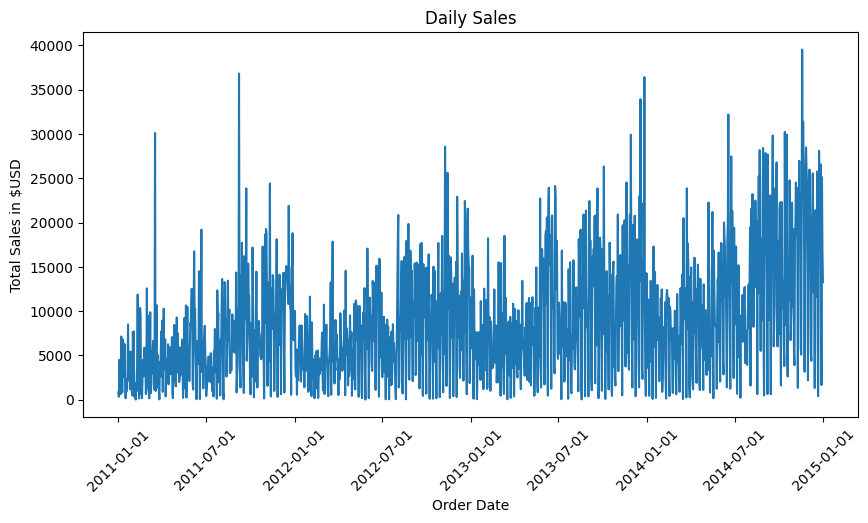

In [ ]:
import matplotlib.dates as mdates

fig = plt.subplots(figsize=(10, 5))
ax = sns.lineplot(data=daily_sales, x="Order Date", y='Sales')

ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=5, maxticks=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

# TODO: improve styling

ax.set_title('Daily Sales')
ax.set_ylabel('Total Sales in $USD')

# Optional: Rotate labels for better readability if needed
plt.xticks(rotation=45)

plt.show()

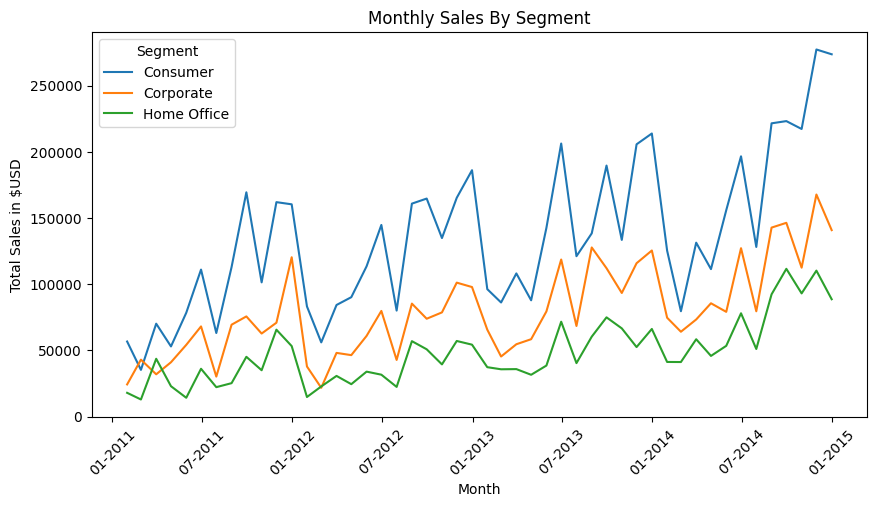

In [ ]:
import matplotlib.dates as mdates

fig = plt.subplots(figsize=(10, 5))

month_sales_by_segment = (
    superstore.groupby([pd.Grouper(key="Order Date", freq="ME"), "Segment"], as_index=False).agg(Sales=("Sales", "sum"))
)
month_sales_by_segment["Order Date"] = pd.to_datetime(month_sales_by_segment["Order Date"])


# TODO: improve styling

ax = sns.lineplot(data=month_sales_by_segment, x="Order Date", y="Sales", hue="Segment")
ax.set_title('Monthly Sales By Segment')
ax.set_ylabel('Total Sales in $USD')
ax.set_xlabel('Month')

# use just 5 dates
ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=6, maxticks=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y"))

plt.xticks(rotation=45)

plt.show()

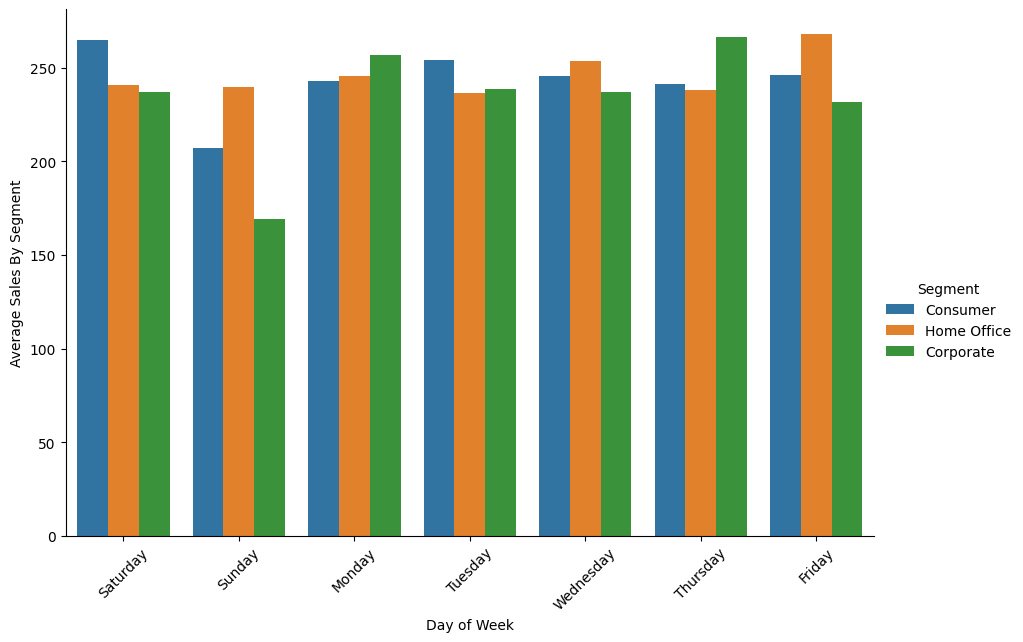

In [123]:
import matplotlib.dates as mdates


daily = superstore.groupby(["Order Date", "Segment"], as_index=False).agg(Sales=("Sales", "mean"))
daily["Day"] = daily["Order Date"].dt.day_name()

p = sns.catplot(data=daily, kind="bar", x="Day", y="Sales", hue="Segment", errorbar=None,  height=6, aspect=1.5 )
p.set_axis_labels("Day of Week", "Average Sales By Segment")
plt.xticks(rotation=45)

plt.show()

In [186]:
import geopandas as gpd
import geoplot as gplt

world = gpd.read_file(gplt.datasets.get_path('world'))


In [236]:
world

,id,name,geometry
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,"POLYGON ((20.59025 41.8554, 20.46318 41.51509,..."
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.2455, 51.75744 24.29407,..."
4,ARG,Argentina,"MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6..."
...,...,...,...
175,PSE,West Bank,"POLYGON ((35.54566 32.39399, 35.54525 31.7825,..."
176,YEM,Yemen,"POLYGON ((53.10857 16.65105, 52.38521 16.38241..."
177,ZAF,South Africa,"POLYGON ((31.521 -29.25739, 31.32556 -29.40198..."
178,ZMB,Zambia,"POLYGON ((32.75938 -9.2306, 33.23139 -9.67672,..."


In [232]:
country = superstore.groupby(["Country"], as_index=False).agg(Sales=("Sales", "sum")).copy()
country["Country"] = country["Country"].replace("United States","United States of America")
country["Country"] = country["Country"].replace("Tanzania", "United Republic of Tanzania")
country["Country"] = country["Country"].replace("Cote d'Ivoire", "Ivory Coast")

In [233]:
merged = world.merge(country, left_on="name", right_on="Country", how="left")

In [ ]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(15, 8)) # Create a figure and axes for plotting

ticks = np.geomspace(merged.Sales.min(), merged.Sales.max() + 100000, num=8)
labels = [f'{int(x/1000)}k' for x in ticks]

world_sales = merged.plot(column='Sales', # Color by population
           ax=ax,
           norm=colors.LogNorm(vmin=np.min(ticks), vmax=np.max(ticks)),
           legend=True, # Show a color bar
           cmap='BuGn', # Choose a colormap
           legend_kwds={'label': "Sales by country", 'orientation': "horizontal", 'shrink': 0.5}) # Customize legend

# 4. Customize the plot (optional)
ax.set_title("World Sales Map", fontsize=16)
ax.set_xticks([]) # Hide x-axis ticks
ax.set_yticks([]) # Hide y-axis ticks

# Get colourbar from second axis
colourbar = ax.get_figure().get_axes()[1]
colourbar.set_xscale("log")
colourbar.set_xticks(ticks, labels=labels)
#yticks = np.interp(colourbar.get_yticks(), [0,1], [merged.Sales.min(), merged.Sales.max()])

# Apply some function f to each tick, where f can be your percentage conversion
#colourbar.set_yticklabels(['{0:.2f}%'.format(ytick*100) for ytick in yticks])

plt.show()

ValueError: Invalid vmin or vmax

Error in callback <function _draw_all_if_interactive at 0x117a9e3e0> (for post_execute), with arguments args (),kwargs {}:


ValueError: Invalid vmin or vmax

ValueError: Invalid vmin or vmax

<Figure size 1500x800 with 2 Axes>

In [292]:
ticks = np.arange(0, merged.Sales.max(), 200000)

labels = [f'{int(x/1000)}k' for x in ticks]
print(labels)

['0k', '200k', '400k', '600k', '800k', '1000k', '1200k', '1400k', '1600k', '1800k', '2000k', '2200k']


In [319]:

np.max(ticks)

np.float64(2397200.8603)